### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [80]:
data = pd.read_csv('data/coupons.csv')

In [44]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [81]:
#There is some odd data that we need to correct
#First, there is a column named car that has some very odd responses and the data is not needed. We will remove it.
data.drop('car', inplace=True, axis=1)

#Second, the column name passenger, is spelled passanger which is incorrect. We'll fix that.
data.rename(columns = {'passanger':'passenger'}, inplace = True)

#There is a column called Y but it's unclear what it's for. This column is indicating if they accepted the coupon so we'll rename it.
data.rename(columns = {'Y':'Used_Coupon'}, inplace = True)

#For the questions on mumber of times they visit a bar, etc. there are 2 answers of "never" and "less than 1" which really mean the same thing
#We will rename resposnes of "less1" to "Never". I also don't like gt8 meaning greater than 8, so we'll rename that as well
data["Bar"] = data["Bar"].str.replace("less1", "0").str.replace("never", "0").str.replace("gt8", "9+")
data["CoffeeHouse"] = data["CoffeeHouse"].str.replace("less1", "0").str.replace("never", "0").str.replace("gt8", "9+")
data["CarryAway"] = data["CarryAway"].str.replace("less1", "0").str.replace("never", "0").str.replace("gt8", "9+")
data["RestaurantLessThan20"] = data["RestaurantLessThan20"].str.replace("less1", "0").str.replace("never", "0").str.replace("gt8", "9+")
data["Restaurant20To50"] = data["Restaurant20To50"].str.replace("less1", "0").str.replace("never", "0").str.replace("gt8", "9+")

#I'm also seeing a lot of NaN in the data so we'll filter those out as needed when analyzing the data

#Finally, the user attributes said it would collect number of children, but it appears the survey only indicates that they
# either have or do not have children. We'll keep this data but it's not the same attributes

4. What proportion of the total observations chose to accept the coupon? 



In [118]:
# Identify the null values
coupon_null_values = data['Used_Coupon'].isnull()

# Sum the non-null values
sum_of_non_null_values = coupon_null_values.value_counts().sum()

#Sum of all the used coupon counts
sum_of_used_coupons = data['Used_Coupon'].value_counts()[1]
sum_of_used_coupons

#Calculate the total percentage of people that chose to use the coupon
Used_Coupon_Percentage = sum_of_used_coupons / sum_of_non_null_values
Used_Coupon_Percentage

#Answer - 57% chose to use the coupon, 43% did not

0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

In [97]:
px.bar(data, x='coupon', title = 'Total Coupons Sent and Type of Coupon').update_layout(
    xaxis_title="Type of Coupon", yaxis_title="Number of Coupons")


6. Use a histogram to visualize the temperature column.

Text(0, 0.5, 'Count')

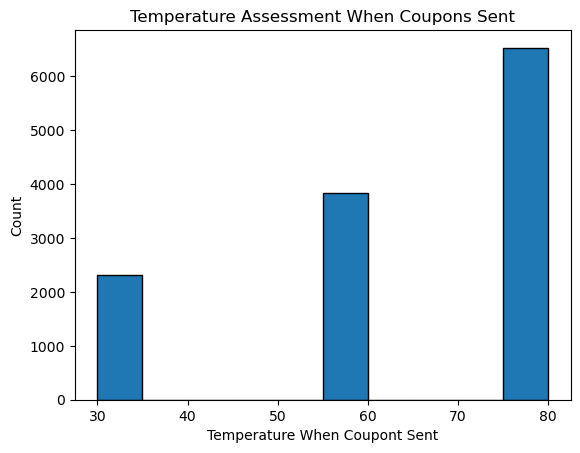

In [101]:
plt.hist(data['temperature'], edgecolor = 'black')
plt.title('Temperature Assessment When Coupons Sent')
plt.xlabel("Temperature When Coupont Sent")
plt.ylabel("Count")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [116]:
bardata = data.query('coupon == "Bar"')
bardata.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Used_Coupon
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,0,0,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,0,0,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,0,0,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,0,0,4~8,4~8,0,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,0,0,4~8,4~8,0,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [222]:
# Identify the null values
bar_coupon_null_values = bardata['Used_Coupon'].isnull()

# Sum the non-null values
bar_sum_of_non_null_values = bar_coupon_null_values.value_counts().sum()

#Sum of all the used coupon counts
bar_sum_of_used_coupons = bardata['Used_Coupon'].value_counts()[1]

#Calculate the total percentage of people that chose to use the coupon
bar_Used_Coupon_Percentage = bar_sum_of_used_coupons / bar_sum_of_non_null_values
bar_Used_Coupon_Percentage_rounded = round(bar_Used_Coupon_Percentage, 3) * 100

#Answer - 41% chose to use the coupon, 59% did not
print ("The total number of bar coupons issed was ", bar_sum_of_non_null_values, "of which ", bar_sum_of_used_coupons, "where used.")
print ("This equates to ", bar_Used_Coupon_Percentage_rounded, "percent of coupons used.")

The total number of bar coupons issed was  2017 of which  827 where used.
This equates to  41.0 percent of coupons used.


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [221]:
#create the 2 groups
bardataless3 = bardata[bardata['Bar'].isin(["0", "1-3"])]
bardatamore3 = bardata[bardata['Bar'].isin(["4-8","9+"])]

#Lets look at the acceptance for the people who visted 3 times or less
barless_sum_of_all_coupons = bardataless3.value_counts().sum()
barless_sum_of_used_coupons = bardataless3['Used_Coupon'].value_counts()[1]
barlessreport = barless_sum_of_used_coupons / barless_sum_of_all_coupons
barlessreportrounded = round(barlessreport, 3) * 100

#Lets look at the acceptance for the people who visted more than 3 times
barmore_sum_of_all_coupons = bardatamore3.value_counts().sum()
barmore_sum_of_used_coupons = bardatamore3['Used_Coupon'].value_counts()[1]
barmorereport = barmore_sum_of_used_coupons / barmore_sum_of_all_coupons
barmorereportrounded = round(barmorereport, 3) * 100

print ("For people who went to bars 3 or less times a month, the acceptance rate of the coupon was ", barlessreportrounded, "percent.")
print ("While the acceptance percentage for people who went to bars more than 3 times a month was ", barmorereportrounded, "percent")


For people who went to bars 3 or less times a month, the acceptance rate of the coupon was  30.5 percent.
While the acceptance percentage for people who went to bars more than 3 times a month was  78.3 percent


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [220]:
bardatamore1over25 = bardata[bardata['Bar'].isin(["1-3","4-8","9+"]) & bardata['age'].isin(['26','31','36','41','46','50plus'])]
everyoneelse = bardata[bardata['Bar'].isin(["1-3","4-8","9+"]) & bardata['age'].isin(['26','31','36','41','46','50plus']) == False]


#Lets look at the acceptance for the people over 25 who visted the bar more than once a month
bardatamore1over25_sum_of_all_coupons = bardatamore1over25.value_counts().sum()
bardatamore1over25_sum_of_used_coupons = bardatamore1over25['Used_Coupon'].value_counts()[1]
bardatamore1over25report = bardatamore1over25_sum_of_used_coupons / bardatamore1over25_sum_of_all_coupons
bardatamore1over25rounded = round(bardatamore1over25report, 3) * 100

#All others
everyoneelse_sum_of_all_coupons = everyoneelse.value_counts().sum()
everyoneelse_sum_of_used_coupons = everyoneelse['Used_Coupon'].value_counts()[1]
everyoneelsereport = everyoneelse_sum_of_used_coupons / everyoneelse_sum_of_all_coupons
everyoneelserounded = round(everyoneelsereport, 3) * 100
everyoneelserounded

print ("For people who went to bars more than once, that were over 25, the acceptance rate was ", bardatamore1over25rounded, "percent")
print ("For everyone else, it was ", everyoneelserounded, "percent.")



For people who went to bars more than once, that were over 25, the acceptance rate was  70.0 percent
For everyone else, it was  42.8 percent.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [219]:
Set1 = bardata[bardata['Bar'].isin(["1-3","4-8","9+"]) & ~bardata['passenger'].isin(["Kids(s)"]) & ~bardata['occupation'].isin(["Farming Fishing & Forestry"])]
Set2 = bardata[bardata['Bar'].isin(["1-3","4-8","9+"]) & ~bardata['passenger'].isin(["Kids(s)"]) & ~bardata['occupation'].isin(["Farming Fishing & Forestry"]) == False]

#Lets look at the acceptance for the people over 25 who visted the bar more than once a month
Set1_sum_of_all_coupons = Set1.value_counts().sum()
Set1_sum_of_used_coupons = Set1['Used_Coupon'].value_counts()[1]
Set1report = Set1_sum_of_used_coupons / Set1_sum_of_all_coupons
Set1rounded = round(Set1report, 3) * 100

#All others
Set2_sum_of_all_coupons = Set2.value_counts().sum()
Set2_sum_of_used_coupons = Set2['Used_Coupon'].value_counts()[1]
Set2report = Set2_sum_of_used_coupons / Set2_sum_of_all_coupons
Set2rounded = round(Set2report, 3) * 100

print ("The acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid and had\n occupations other than farming, fishing, or forestry was", Set1rounded, "percent\n")
print ("For everyone else, it was", Set2rounded, "percent.")

The acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid and had
 occupations other than farming, fishing, or forestry was 78.3 percent

For everyone else, it was 42.4 percent.


### 6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [233]:
Set6a = bardata[bardata['Bar'].isin(["1-3","4-8","9+"]) & ~bardata['passenger'].isin(["Kids(s)"]) & ~bardata['maritalStatus'].isin(["Widowed"])]
Set6b = bardata[bardata['age'].isin(["below21","21","26"]) & bardata['age'].isin(['26','21','below21'])]
Set6c = bardata[bardata['RestaurantLessThan20'].isin(["4-8","9+"]) & bardata['income'].isin(['$25000 - $37499', '$12500 - $24999','$37500 - $49999','Less than $12500'])]

#Set 6a
Set6a_sum_of_all_coupons = Set6a.value_counts().sum()
Set6a_sum_of_used_coupons = Set6a['Used_Coupon'].value_counts()[1]
Set6areport = Set6a_sum_of_used_coupons / Set6a_sum_of_all_coupons
Set6arounded = round(Set6areport, 3) * 100

Set6b_sum_of_all_coupons = Set6b.value_counts().sum()
Set6b_sum_of_used_coupons = Set6b['Used_Coupon'].value_counts()[1]
Set6breport = Set6b_sum_of_used_coupons / Set6b_sum_of_all_coupons
Set6brounded = round(Set6breport, 3) * 100
Set6brounded

Set6c_sum_of_all_coupons = Set6c.value_counts().sum()
Set6c_sum_of_used_coupons = Set6c['Used_Coupon'].value_counts()[1]
Set6creport = Set6c_sum_of_used_coupons / Set6c_sum_of_all_coupons
Set6crounded = round(Set6creport, 3) * 100
Set6crounded

print ("For people that go to bars more than once a month, had passengers that were not a kid, and were not widowed the acceptance rate was ", Set6arounded, "percent.\n")
print ("For people that go to bars more than once a month and are under the age of 30 the acceptance rate was ", Set6brounded, "percent.\n")
print ("For people that go to cheap restaurants more than 4 times a month and income is less than 50K., the acceptance rate was ", Set6crounded, "percent.\n")


For people that go to bars more than once a month, had passengers that were not a kid, and were not widowed the acceptance rate was  78.3 percent.

For people that go to bars more than once a month and are under the age of 30 the acceptance rate was  52.0 percent.

For people that go to cheap restaurants more than 4 times a month and income is less than 50K., the acceptance rate was  59.4 percent.



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
#Based on these observations the people that went to bars more than 3 times a month were significantly more likely to 
# accept the coupon.  Additionally, people over 21 and don't have kids in the car, are also more likely to accept it.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [254]:
#Creating a data set to look at coupons where the coupon sent was for a restaurant $20-$50 only
restdata = data.query('coupon == "Restaurant(20-50)"')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Less than $12500'),
  Text(1, 0, '$12500 - $24999'),
  Text(2, 0, '$25000 - $37499'),
  Text(3, 0, '$37500 - $49999'),
  Text(4, 0, '$50000 - $62499'),
  Text(5, 0, '$62500 - $74999'),
  Text(6, 0, '$75000 - $87499'),
  Text(7, 0, '$87500 - $99999'),
  Text(8, 0, '$100000 or More')])

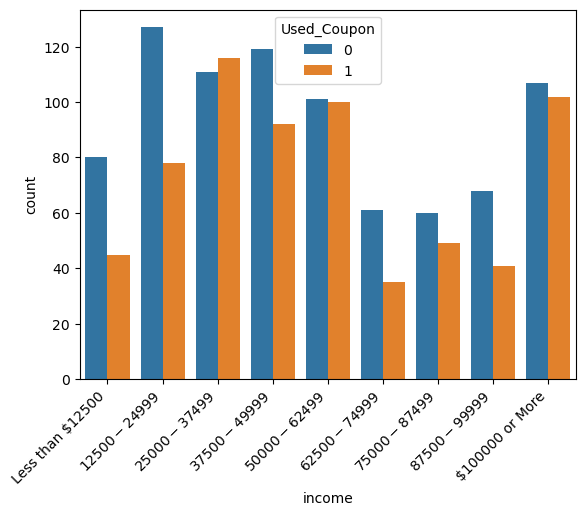

In [311]:
#Lets look at the use of coupons based on income.
orderlowtohigh = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999', '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More']
sns.countplot(data=restdata, x="income", hue="Used_Coupon", order=orderlowtohigh)
plt.xticks(rotation=45, ha="right")

#It appears that the 2 low income brackets have a lower percentage of used coupons, but some of the income earners
#From $62k-99k also didn't used as much as others, as a percentage

In [288]:
#Here we'll look at income and age against people who used the expensive restruant coupon more.

lowincome = ['Less than $12500', '$12500 - $24999']
midincome = ['$25000 - $37499','$37500 - $49999', '$50000 - $62499', '$62500 - $74999']
highincome =['$75000 - $87499', '$87500 - $99999', '$100000 or More']
youngage = ['below21', '21', '26']
midage = ['31', '36', '41', '46']
oldage = ['50plus']

#We want to create a query showing low income earners who are young
rest1 = restdata.query('income == @lowincome & age == @youngage')
rest1answer = rest1['Used_Coupon'].mean().round(3)*100

#We want to create a query showing mid income earners who are midage
rest2 = restdata.query('income == @midincome & age == @midage')
rest2answer = rest2['Used_Coupon'].mean().round(3)*100

#We want to create a query showing high income earners, any age
rest3 = restdata.query('income == @highincome')
rest3answer = rest3['Used_Coupon'].mean().round(3)*100

#We want to create a query showing high income earners, over 50
rest4 = restdata.query('income == @highincome & age == @oldage')
rest4answer = rest4['Used_Coupon'].mean().round(3)*100


print('People that made less than $25k and are under 26 used expensive restruant coupons', rest1answer, 'percent\n')
print('People that made $25k-$75k and are 31-46 years old used expensive restruant coupons', rest2answer, 'percent\n')
print('People that made over $75k used expensive restruant coupons', rest3answer, 'percent\n')
print('People that made over $75k and were over 50 used expensive restruant coupons', rest4answer, 'percent\n')


People that made less than $25k and are under 26 used expensive restruant coupons 43.2 percent

People that made $25k-$75k and are 31-46 years old used expensive restruant coupons 48.3 percent

People that made over $75k used expensive restruant coupons 45.0 percent

People that made over $75k and were over 50 used expensive restruant coupons 39.2 percent



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Architecture & Engineering'),
  Text(2, 0, 'Student'),
  Text(3, 0, 'Education&Training&Library'),
  Text(4, 0, 'Healthcare Support'),
  Text(5, 0, 'Healthcare Practitioners & Technical'),
  Text(6, 0, 'Sales & Related'),
  Text(7, 0, 'Management'),
  Text(8, 0, 'Arts Design Entertainment Sports & Media'),
  Text(9, 0, 'Computer & Mathematical'),
  Text(10, 0, 'Life Physical Social Science'),
  Text(11, 0, 'Personal Care & Service'),
  Text(12, 0, 'Community & Social Services'),
  Text(13, 0, 'Office & Administrative Support'),
  Text(14, 0, 'Construction & Extraction'),
  Text(15, 0, 'Legal'),
  Text(16, 0, 'Retired'),
  Text(17, 0, 'Installation Maintenance & Repair'),
  Text(18, 0, 'Transportation & Material Moving'),
  Text(19, 0, 'Business & Financial'),
  Text(20, 0, 'Protective Service'),
  Text(21, 0, 'Food Preparation &

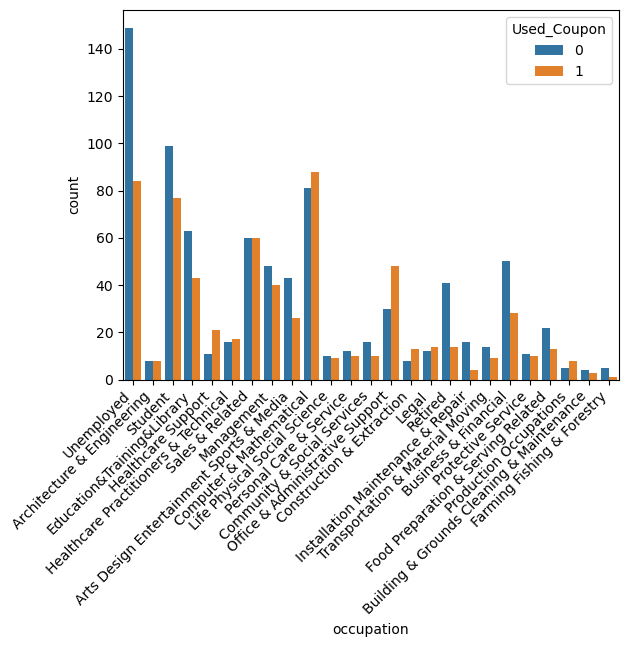

In [312]:
#Lets take a look at occupation vs use of expensive resturant coupons
sns.countplot(data=restdata, x="occupation", hue="Used_Coupon")
plt.xticks(rotation=45, ha="right")

#Interestingly we can see that retired, unemployed and for some reason, business & financial occupations used
#them the least

In [337]:
#Lets take a look at a few of the percentages

#Lets look at unemployed usage of the coupon
occ1 = restdata.query('occupation == "Unemployed"')
occ1answer = occ1['Used_Coupon'].mean().round(3)*100

#Now retired people
occ2 = restdata.query('occupation == "Retired"')
occ2answer = occ2['Used_Coupon'].mean().round(3)*100

#Now Business & Financial
occ3 = restdata.query('occupation == "Business & Financial"')
occ3answer = occ3['Used_Coupon'].mean().round(3)*100

#Now Office & Admin Support
occ4 = restdata.query('occupation == "Office & Administrative Support"')
occ4answer = occ4['Used_Coupon'].mean().round(3)*100

#Now Healthcare Support
occ5 = restdata.query('occupation == "Healthcare Support"')
occ5answer = occ5['Used_Coupon'].mean().round(2)*100

#Expensive Restaurant overall acceptance
restall = restdata['Used_Coupon'].mean().round(2)*100

print('Based on what we saw in the graph, if you were Unemployed, Retured or worked in Business & Fianncial\n your acceptance rate of the counpon was the lowest at', occ1answer, occ2answer, "and", occ3answer, "percent, respectively.\n")
print('However, we saw the highest percentage with Office & Admin Support and Healthcare Support coming in at\n', occ4answer, 'and', occ5answer, 'percent respectivley.\n')
print('Overall, the average acceptance rate was', restall, "percent for expensive restaurants, which is relativley low.")

Based on what we saw in the graph, if you were Unemployed, Retured or worked in Business & Fianncial
 your acceptance rate of the counpon was the lowest at 36.1 25.5 and 35.9 percent, respectively.

However, we saw the highest percentage with Office & Admin Support and Healthcare Support coming in at
 61.5 and 66.0 percent respectivley.

Overall, the average acceptance rate was 44.0 percent for expensive restaurants, which is relativley low.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Architecture & Engineering'),
  Text(2, 0, 'Student'),
  Text(3, 0, 'Education&Training&Library'),
  Text(4, 0, 'Healthcare Support'),
  Text(5, 0, 'Healthcare Practitioners & Technical'),
  Text(6, 0, 'Sales & Related'),
  Text(7, 0, 'Management'),
  Text(8, 0, 'Arts Design Entertainment Sports & Media'),
  Text(9, 0, 'Computer & Mathematical'),
  Text(10, 0, 'Life Physical Social Science'),
  Text(11, 0, 'Personal Care & Service'),
  Text(12, 0, 'Community & Social Services'),
  Text(13, 0, 'Office & Administrative Support'),
  Text(14, 0, 'Construction & Extraction'),
  Text(15, 0, 'Legal'),
  Text(16, 0, 'Retired'),
  Text(17, 0, 'Installation Maintenance & Repair'),
  Text(18, 0, 'Transportation & Material Moving'),
  Text(19, 0, 'Business & Financial'),
  Text(20, 0, 'Protective Service'),
  Text(21, 0, 'Food Preparation &

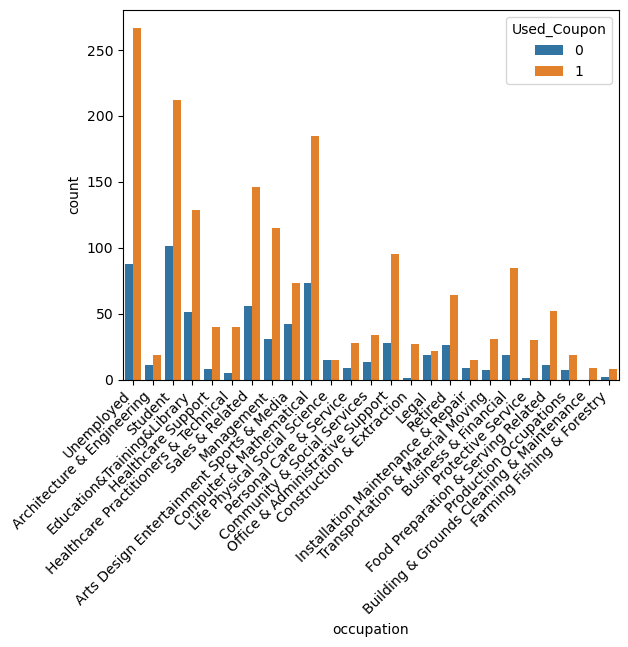

In [329]:
#Finally, lets take a look at a new data set and look at use of the CarryAway coupon by occpation to see if
#we learn anything new

carrydata = data.query('coupon == "Carry out & Take away"')

sns.countplot(data=carrydata, x="occupation", hue="Used_Coupon")
plt.xticks(rotation=45, ha="right")

In [336]:
#Lets look at unemployed usage of the coupon
carry1 = carrydata.query('occupation == "Unemployed"')
carry1answer = carry1['Used_Coupon'].mean().round(3)*100

#Now retired people
carry2 = carrydata.query('occupation == "Retired"')
carry2answer = carry2['Used_Coupon'].mean().round(3)*100

#Now Business & Financial
carry3 = carrydata.query('occupation == "Business & Financial"')
carry3answer = carry3['Used_Coupon'].mean().round(2)*100

#Now Office & Admin Support
carry4 = carrydata.query('occupation == "Office & Administrative Support"')
carry4answer = carry4['Used_Coupon'].mean().round(3)*100

#Now Healthcare Support
carry5 = carrydata.query('occupation == "Healthcare Support"')
carry5answer = carry5['Used_Coupon'].mean().round(2)*100

#Carry Away overall acceptance
carryall = carrydata['Used_Coupon'].mean().round(2)*100

print('Now we see that anyone who is Unemployed, Retired or worked in Business & Fianncial\n your acceptance rate of the Carry Away counpon was very high at', carry1answer, carry2answer, "and", carry3answer, "percent, respectively.\n")
print('While office admin and healthcare were also high for Carry Away at', carry4answer, 'and', carry5answer, 'percent respectively.\n')
print('We can see the Carry Away was much higher overall at', carryall, 'percent.')

Now we see that anyone who is Unemployed, Retired or worked in Business & Fianncial
 your acceptance rate of the Carry Away counpon was very high at 75.2 71.1 and 82.0 percent, respectively.

While office admin and healthcare were also high for Carry Away at 77.2 and 83.0 percent respectively.

We can see the Carry Away was much higher overall at 74.0 percent.


In [341]:
#One last exercise with the above findings.  Now I want to know the overall acceptance percentage of all coupon types.

#Creating data sets
coffeedata = data.query('coupon == "Coffee House"')
cheaprestdata = data.query('coupon == "Restaurant(<20)"')
bardata = data.query('coupon == "Bar"')

#Overall acceptance
coffeeall = coffeedata['Used_Coupon'].mean().round(2)*100
cheaprestall = cheaprestdata['Used_Coupon'].mean().round(2)*100
barall = bardata['Used_Coupon'].mean().round(2)*100


print('We know the overall acceptance percentage of expensive restaurants and carry away is', restall, 'and', carryall,'.\n')
print('For the others the overall acceptance is:\n')
print(coffeeall,'percent for Coffee Houses.\n')
print(cheaprestall,'percent for cheaper restaurants.\n')
print(barall,'percent for bars.\n')
print('Clearly the most used coupons are for Carry Away and cheaper restaurants.')

We know the overall acceptance percentage of expensive restaurants and carry away is 44.0 and 74.0 .

For the others the overall acceptance is:

50.0 percent for Coffee Houses.

71.0 percent for cheaper restaurants.

41.0 percent for bars.

Clearly the most used coupons are for Carry Away and cheaper restaurants.
